In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt     
from pre import Training_data
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, models

In [2]:
def plot_history(history : tf.keras.callbacks.History):
    """ This helper function takes the tensorflow.python.keras.callbacks.History
    that is output from your `fit` method to plot the loss and accuracy of
    the training and validation set.
    """
    fig, axs = plt.subplots(1,2, figsize=(12,6))
    axs[0].plot(history.history['accuracy'], label='training set')
    axs[0].plot(history.history['val_accuracy'], label = 'validation set')
    axs[0].set(xlabel = 'Epoch', ylabel='Accuracy', ylim=[0, 1])

    axs[1].plot(history.history['loss'], label='training set')
    axs[1].plot(history.history['val_loss'], label = 'validation set')
    axs[1].set(xlabel = 'Epoch', ylabel='Loss', ylim=[0, 10])
    
    axs[0].legend(loc='lower right')
    axs[1].legend(loc='lower right')


In [3]:
#amount of classes
_AMOUNT_CLASSE = 11
training_data = Training_data('training',_AMOUNT_CLASSE)

#import the training data
_training_data = np.load('training_data.npy')
labels = np.load('training_labels.npy')

Files already exis, import them!
data: training_data.npy| labels: training_labels.npy


In [4]:
#getting the train and validation data
train_dice, val_dice, train_labels, val_labels = train_test_split(
    _training_data, 
    labels,
    test_size=0.2, 
    random_state=42, 
    shuffle=True
)

In [5]:
#parameters
input_size = 128
filter = 10
epochs = 10
batchsize = 64
learning_rate=0.00001

strides = (2, 2)
pool_size = (2,2)
kernel_size = (5,5)

In [6]:

with tf.device('/GPU:0'):
    # Create the first version of the model
    model2 = models.Sequential([
        layers.Conv2D(filters=4,kernel_size=kernel_size,kernel_regularizer=tf.keras.regularizers.l2(0.0001),activation='relu',input_shape=(input_size,input_size,1)),
        layers.MaxPooling2D(pool_size=pool_size,strides=strides,padding='same'),
        layers.Dropout(0.4),
        layers.Flatten(),
        #layers.Dense(128,activation='relu'),
        layers.Dense(_AMOUNT_CLASSE,activation='Softmax'),
    ])
    model2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 124, 124, 4)       104       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 62, 62, 4)        0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 62, 62, 4)         0         
                                                                 
 flatten (Flatten)           (None, 15376)             0         
                                                                 
 dense (Dense)               (None, 11)                169147    
                                                                 
Total params: 169,251
Trainable params: 169,251
Non-trainable params: 0
__________________________________________________

In [7]:

with tf.device('/GPU:0'):
    # Create the first version of the model
    model = models.Sequential([
        layers.Conv2D(filters=filter,kernel_size=kernel_size,kernel_regularizer=tf.keras.regularizers.l2(0.0001),activation='relu',input_shape=(128,128,1)),
        layers.MaxPooling2D(pool_size=pool_size,strides=strides,padding='same'),
        
        layers.Conv2D(filters=filter/2,kernel_size=kernel_size,kernel_regularizer=tf.keras.regularizers.l2(0.0001),activation='relu'),
        layers.MaxPooling2D(pool_size=pool_size,strides=strides,padding='same'),
        layers.Dropout(0.5),
        layers.Flatten(),
        #layers.Dense(128,activation='relu'),
        layers.Dense(_AMOUNT_CLASSE,activation='Softmax'),
    ])

    model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 124, 124, 10)      260       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 10)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 58, 58, 5)         1255      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 29, 29, 5)        0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 29, 29, 5)         0         
                                                                 
 flatten_1 (Flatten)         (None, 4205)             

In [8]:
#compiling the models
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model2.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [9]:
#first model training
with tf.device('/GPU:0'):
    history = model.fit(train_dice,train_labels,epochs=epochs,validation_data=(val_dice,val_labels),batch_size=batchsize)


Epoch 1/10
83/83 [==============================] - 7s 49ms/step - loss: 2.4248 - accuracy: 0.1138 - val_loss: 2.2926 - val_accuracy: 0.1270
Epoch 2/10
83/83 [==============================] - 6s 77ms/step - loss: 2.3097 - accuracy: 0.1594 - val_loss: 2.2273 - val_accuracy: 0.1414
Epoch 3/10
83/83 [==============================] - 6s 76ms/step - loss: 2.2532 - accuracy: 0.1785 - val_loss: 2.1638 - val_accuracy: 0.1901
Epoch 4/10
83/83 [==============================] - 7s 80ms/step - loss: 2.1875 - accuracy: 0.2041 - val_loss: 2.0909 - val_accuracy: 0.2981
Epoch 5/10
83/83 [==============================] - 6s 76ms/step - loss: 2.1047 - accuracy: 0.2445 - val_loss: 1.9985 - val_accuracy: 0.3703
Epoch 6/10
83/83 [==============================] - 6s 78ms/step - loss: 2.0185 - accuracy: 0.2913 - val_loss: 1.8823 - val_accuracy: 0.5133
Epoch 7/10
83/83 [==============================] - 6s 77ms/step - loss: 1.9153 - accuracy: 0.3427 - val_loss: 1.7393 - val_accuracy: 0.7163
Epoch 8/10
83

In [10]:
#second model training
with tf.device('/GPU:0'):
    history2 = model2.fit(train_dice,train_labels,epochs=epochs,validation_data=(val_dice,val_labels),batch_size=batchsize)

Epoch 1/10
83/83 [==============================] - 5s 48ms/step - loss: 2.2123 - accuracy: 0.2302 - val_loss: 1.7835 - val_accuracy: 0.6806
Epoch 2/10
83/83 [==============================] - 3s 42ms/step - loss: 1.8197 - accuracy: 0.3820 - val_loss: 1.4337 - val_accuracy: 0.8304
Epoch 3/10
83/83 [==============================] - 3s 41ms/step - loss: 1.4962 - accuracy: 0.5228 - val_loss: 1.1385 - val_accuracy: 0.8875
Epoch 4/10
83/83 [==============================] - 4s 43ms/step - loss: 1.2127 - accuracy: 0.6631 - val_loss: 0.8959 - val_accuracy: 1.0000
Epoch 5/10
83/83 [==============================] - 4s 44ms/step - loss: 0.9938 - accuracy: 0.7447 - val_loss: 0.7057 - val_accuracy: 1.0000
Epoch 6/10
83/83 [==============================] - 3s 41ms/step - loss: 0.8300 - accuracy: 0.7978 - val_loss: 0.5624 - val_accuracy: 1.0000
Epoch 7/10
83/83 [==============================] - 3s 39ms/step - loss: 0.6940 - accuracy: 0.8467 - val_loss: 0.4544 - val_accuracy: 1.0000
Epoch 8/10
83

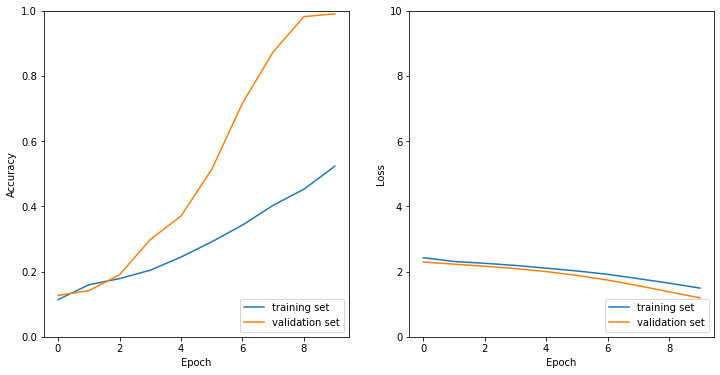

In [11]:
plot_history(history)

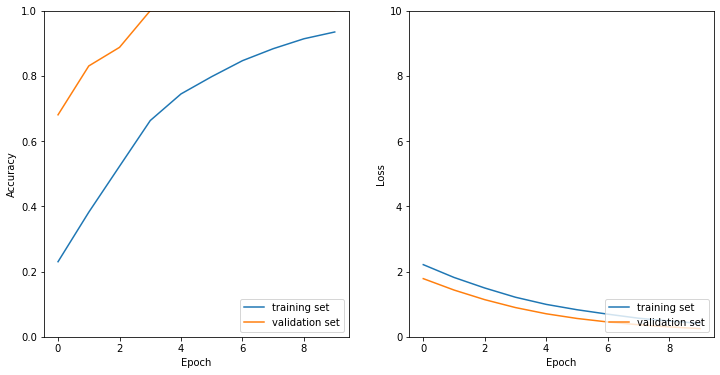

In [12]:
plot_history(history2)

In [14]:
model.save('model1')
model2.save('model2')

INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model2\assets


INFO:tensorflow:Assets written to: model2\assets
